In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [16]:
def create_pdf(im_in):#Function to create PDF
    histogram = np.zeros(256)
    for pixel in im_in:
        histogram[pixel] += 1
    total_pixels = im_in.size
    pdf = histogram / total_pixels
    return pdf


In [17]:
def create_cdf(pdf):#Function to create CDF
    cdf = np.zeros_like(pdf)
    cdf[0] = pdf[0]
    for i in range(1, len(pdf)):
      cdf[i] = cdf[i-1] + pdf[i]
    return cdf


In [18]:
def plot_pdf(image, title):#Function to plot the PDF of an image

    pdf = create_pdf(image)
    plt.figure(figsize=(8, 4))
    plt.bar(np.arange(256), pdf, color='tab:red', alpha=0.6)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Histogram (PDF)')
    plt.title(title + ' PDF')
    plt.xlim(0, 255)
    plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
    plt.show()


In [19]:
def plot_cdf(image, title):#Function to plot the CDF of an image
    """Plot the CDF of an image."""
    pdf = create_pdf(image)
    cdf = create_cdf(pdf)
    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(256), cdf, color='tab:blue')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Distribution Function (CDF)')
    plt.title(title + ' CDF')
    plt.xlim(0, 255)
    plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
    plt.show()


In [20]:
def histogram_matching(source, reference):#Function to perfrom Histogram Matching such that it returns matched image after taking input source image and reference image,adjusting its contrast.
    # Compute PDFs and CDFs
    source_pdf = create_pdf(source.flatten())
    source_cdf = create_cdf(source_pdf)
    reference_pdf = create_pdf(reference.flatten())
    reference_cdf = create_cdf(reference_pdf)

    mapping_function = np.zeros(256, dtype=np.uint8)
    for pixel_value in range(256):
        closest_idx = np.argmin(np.abs(reference_cdf - source_cdf[pixel_value]))
        mapping_function[pixel_value] = closest_idx

    matched_image = mapping_function[source.flatten()].reshape(source.shape)

    return source, reference, matched_image, source_pdf, source_cdf, reference_pdf, reference_cdf


In [21]:
def display_images(source, reference, matched):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(source, cmap='gray')
    axes[0].set_title('Source Image')
    axes[1].imshow(reference, cmap='gray')
    axes[1].set_title('Reference Image')
    axes[2].imshow(matched, cmap='gray')
    axes[2].set_title('Matched Image')
    for ax in axes:
        ax.axis('off')
    plt.show()


In [22]:
def plot_source(source):
    source_pdf = create_pdf(source.flatten())
    source_cdf = create_cdf(source_pdf)

    plot_pdf(source.flatten(), 'Source Image')
    plot_cdf(source.flatten(), 'Source Image')


In [23]:
def plot_reference(reference):
    reference_pdf = create_pdf(reference.flatten())
    reference_cdf = create_cdf(reference_pdf)

    plot_pdf(reference.flatten(), 'Reference Image')
    plot_cdf(reference.flatten(), 'Reference Image')


In [24]:
def plot_matched(matched):
    matched_pdf = create_pdf(matched.flatten())
    matched_cdf = create_cdf(matched_pdf)

    plot_pdf(matched.flatten(), 'Matched Image')
    plot_cdf(matched.flatten(), 'Matched Image')


In [25]:
source_img_path = '/content/treec.jpg'
reference_img_path = '/content/imgcv2.png'
source_img = Image.open(source_img_path).convert('L')
reference_img = Image.open(reference_img_path).convert('L')
source_array = np.array(source_img)
reference_array = np.array(reference_img)


In [26]:
source, reference, matched, source_pdf, source_cdf, reference_pdf, reference_cdf = histogram_matching(source_array, reference_array)

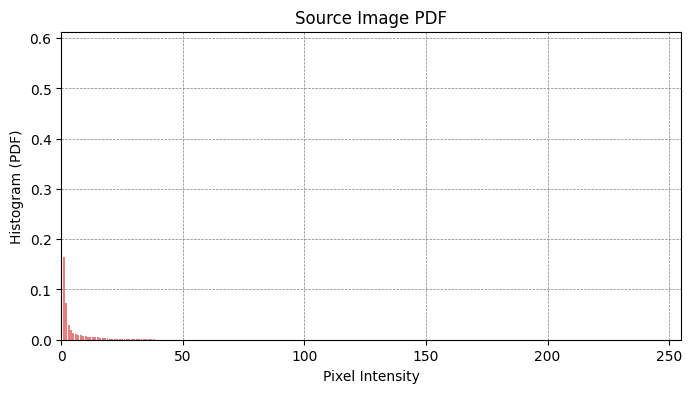

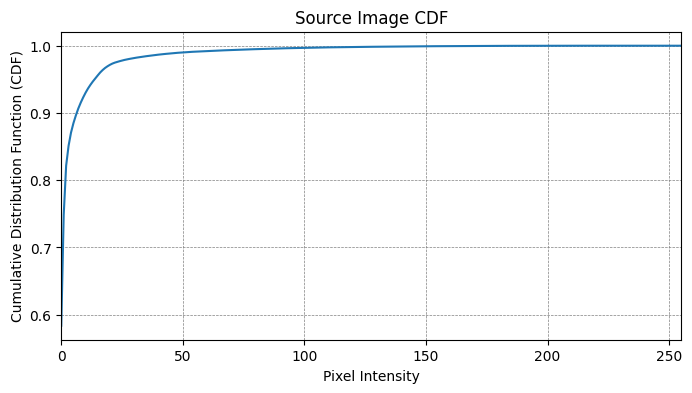

In [27]:
plot_source(source)


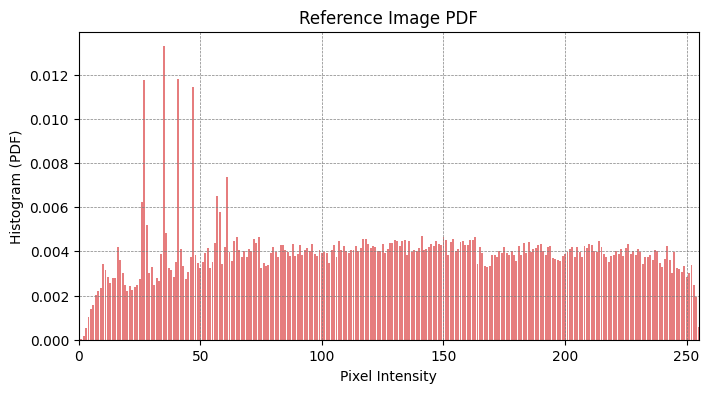

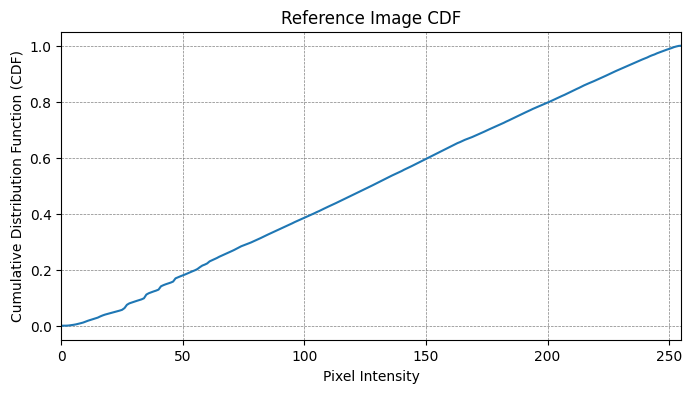

In [28]:
plot_reference(reference)



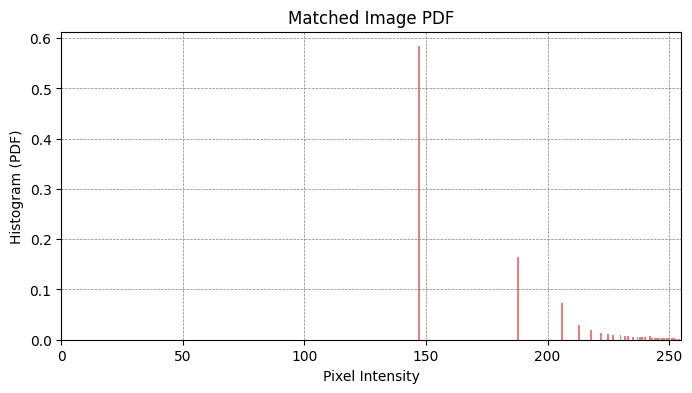

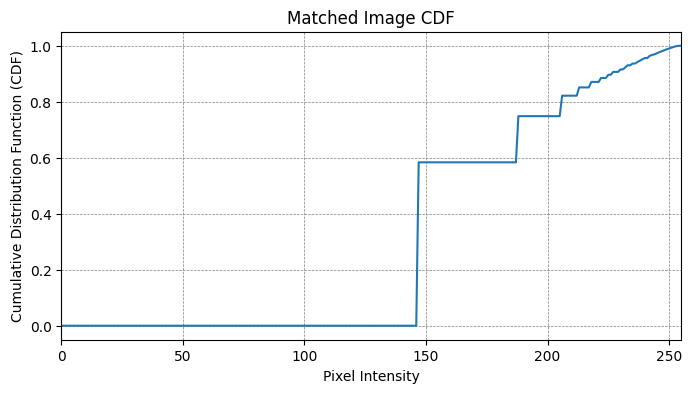

In [29]:

plot_matched(matched)


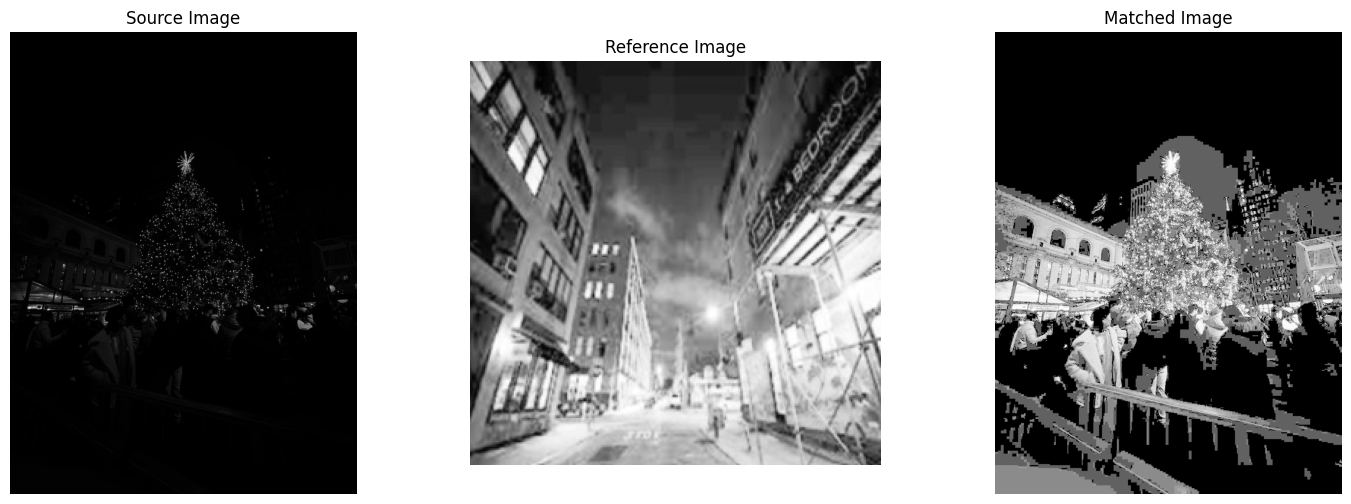

In [30]:
# Display images
display_images(source, reference, matched)